In [114]:
import numpy as np
import pandas as pd
import fileinput
import os,sys
import matplotlib.pyplot as plt

path = "/nobackup/users/killaars/ELNino/Discharge_ANA/"
timeseries = pd.date_range('1/1/2005', '31/12/2017', freq='D')

alldata = pd.DataFrame({},index=timeseries)
counter = 1

for root, dirs, files in os.walk(path):
    for file in sorted(files):
        if file.endswith('.txt'):
            name=file.split('_')[0][8:]
            print(name,counter, "of 69")
            counter +=1
            # Clean up the files, only necessary for the first full run.
            fullpath = os.path.join(path,file)
            with fileinput.FileInput(fullpath, inplace=True, backup='.bak') as file:
                for line in file:
                    print(" ".join(line.split()))

            # Read data from file, seperated by space and 4 columns of data
            data = pd.read_csv(fullpath, sep=" ")
            data.columns = ["Date", "Time", "Discharge", "etc."]
            
            # Delete first line of table:
            data=data.drop(data.index[0])
            
            # Create new data column with similar date format as in the index of the big dataframe:
            data["new_date"]=pd.to_datetime(data["Date"],format='%d/%m/%Y')
            
            # Group data per day
            grouped_data=data['Discharge'].groupby(data['new_date']).describe()
            #print(grouped_data['mean'])
            
            # Insert mean discharge per day of current station in the big dataframe:
            alldata[name]=grouped_data['mean']
print(alldata)
            

            
                
                


#             f, (ax1) = plt.subplots(1, 1, sharex=True, figsize=(20,10))
#             size = 2
#             alpha=.3
#             ax1.set_title('Discharge '+name)
#             ax1.plot_date(x=data.new_date[-100:], y=data.Discharge[-100:], color='b', alpha=alpha, ms=size)

#             ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#             plt.show()
#             sys.exit()

TABATINGA 1 of 69
PALMEIRASDOJAVARI 2 of 69
THAUMATURGO 3 of 69
PORTOWALTER 4 of 69
SERRADOMOA 5 of 69
CRUZEIRODOSUL 6 of 69
IPIXUNA 7 of 69
EIRUNEPÉ-MONTANTE 8 of 69
SERINGALSANTAHELENA 9 of 69
FEIJÓ 10 of 69
SANTOSDUMONT 11 of 69
VILABITTENCOURT 12 of 69
ACANAUI 13 of 69
MANOELURBANO 14 of 69
SERINGALSÃOJOSÉ 15 of 69
SENAMADUREIRA 16 of 69
SERINGALGUARANY 17 of 69
ASSISBRASIL 18 of 69
ASSISBRASIL-CPRM 19 of 69
BRASILÉIA 20 of 69
RIOBRANCO 21 of 69
RIOBRANCO-CPRM 22 of 69
VALPARAÍSO-MONTANTE 23 of 69
LÁBREA 24 of 69
BERURI 25 of 69
MANACAPURU 26 of 69
CUCUÍ 27 of 69
TARAQUÁ 28 of 69
CURICURIARI 29 of 69
UAICÁS 30 of 69
MARACÁ 31 of 69
FAZENDACAJUPIRANGA 32 of 69
FAZENDAPASSARÃO 33 of 69
PONTEDOTACUTU 34 of 69
FAZENDAPARAÍSO 35 of 69
VILASURUMU 36 of 69
FAZENDABANDEIRABRANCA 37 of 69
FÉEESPERANÇA 38 of 69
MUCAJAÍ 39 of 69
CARACARAÍ 40 of 69
PONTESELACERDA 41 of 69
PIMENTEIRAS 42 of 69
PEDRASNEGRAS 43 of 69
CACHOEIRADOCACHIMBO 44 of 69
PRINCIPEDABEIRA 45 of 69
GUAJARÁ-MIRIM 46 of 69
ABU

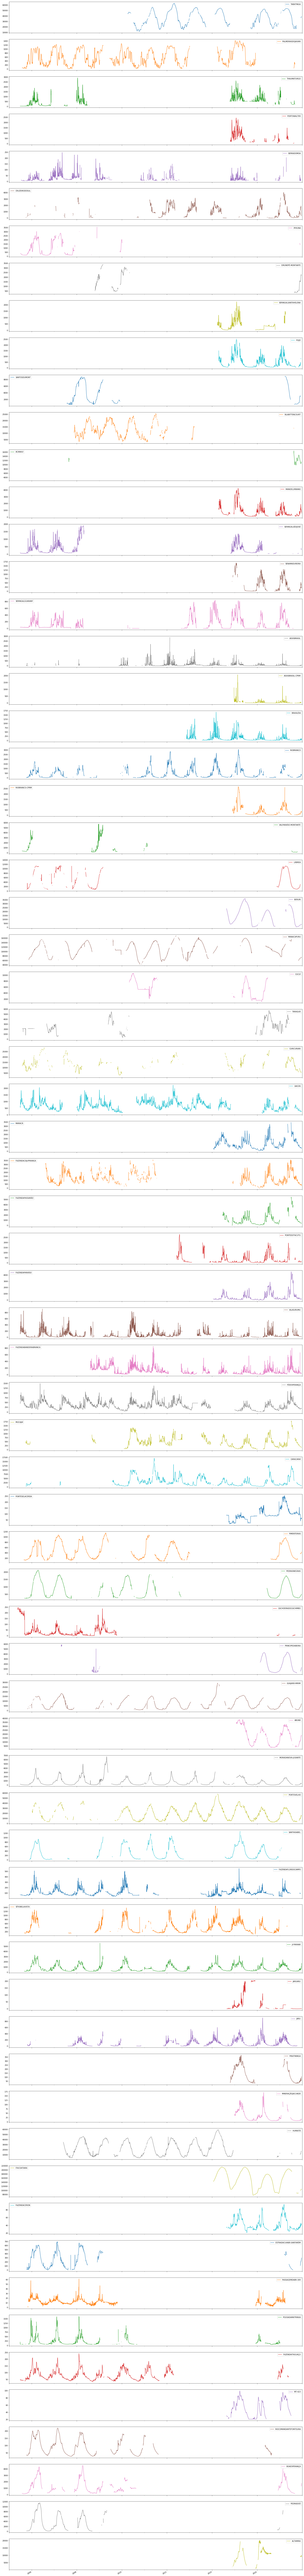

In [124]:
alldata.plot(subplots=True, figsize=(30, 300));
plt.show()

              Date      Time  Discharge  etc.
1       23/01/2014  00:15:00        NaN   NaN
2       23/01/2014  00:30:00        NaN   NaN
3       23/01/2014  00:45:00        NaN   NaN
4       23/01/2014  01:00:00        NaN   NaN
5       23/01/2014  01:15:00        NaN   NaN
6       23/01/2014  01:30:00        NaN   NaN
7       23/01/2014  01:45:00        NaN   NaN
8       23/01/2014  02:00:00        NaN   NaN
9       23/01/2014  02:15:00        NaN   NaN
10      23/01/2014  02:30:00        NaN   NaN
11      23/01/2014  02:45:00        NaN   NaN
12      23/01/2014  03:00:00        NaN   NaN
13      23/01/2014  03:15:00        NaN   NaN
14      23/01/2014  03:30:00        NaN   NaN
15      23/01/2014  03:45:00        NaN   NaN
16      23/01/2014  04:00:00        NaN   NaN
17      23/01/2014  04:15:00        NaN   NaN
18      23/01/2014  04:30:00        NaN   NaN
19      23/01/2014  04:45:00        NaN   NaN
20      23/01/2014  05:00:00        NaN   NaN
21      23/01/2014  05:15:00      

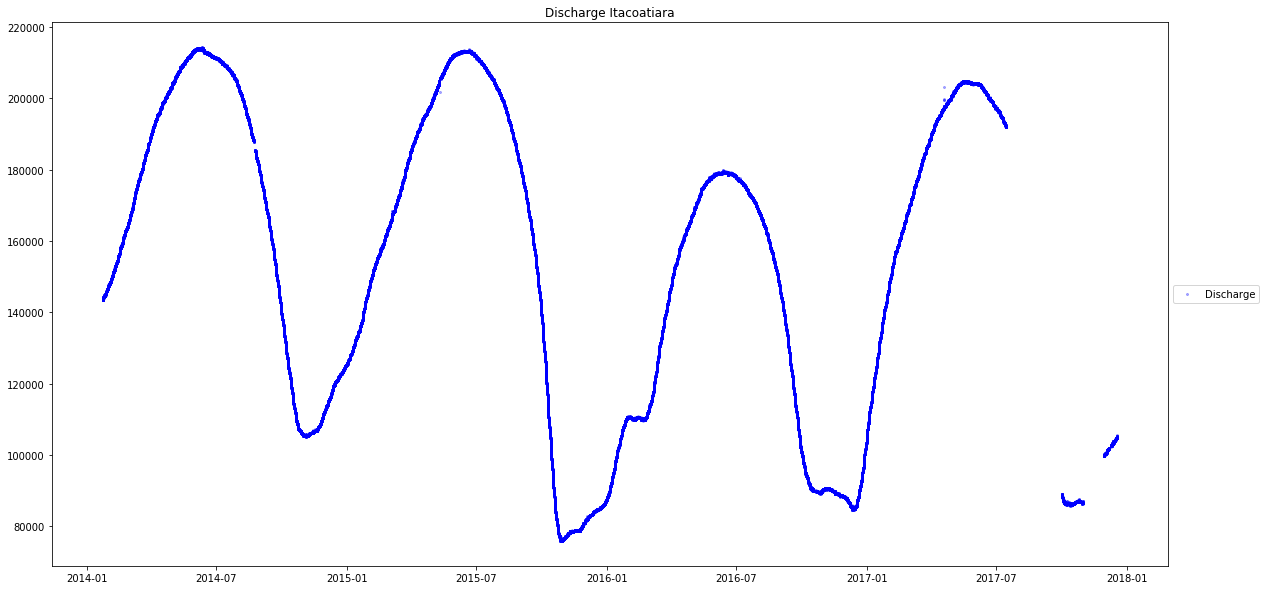

In [53]:
import numpy as np
import pandas as pd
import fileinput
import os,sys
import matplotlib.pyplot as plt
#import seaborn as sns

with fileinput.FileInput('/usr/people/killaars/Downloads/16030000ITACOATIARA_2312014-18122017.txt', inplace=True, backup='.bak') as file:
    for line in file:
        print(" ".join(line.split()))

data = pd.read_csv('/usr/people/killaars/Downloads/16030000ITACOATIARA_2312014-18122017.txt', sep=" ")
#data = pd.read_fwf('/usr/people/killaars/Downloads/Small_discharge.txt',header=None)
data.columns = ["Date", "Time", "Discharge", "etc."]

data=data.drop(data.index[0])
print(data)
data["new_date"]=pd.to_datetime(data["Date"],format='%d/%m/%Y')
#print(data)
print(data['Discharge'].groupby(data['new_date']).describe())

f, (ax1) = plt.subplots(1, 1, sharex=True, figsize=(20,10))
size = 2
alpha=.3
ax1.set_title('Discharge Itacoatiara')
ax1.plot_date(x=data.new_date, y=data.Discharge, color='b', alpha=alpha, ms=size)

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

              Date      Time  Discharge  etc.
1       29/06/2005  01:00:00        NaN   NaN
2       29/06/2005  02:00:00        NaN   NaN
3       29/06/2005  03:00:00     220.00   NaN
4       29/06/2005  04:00:00     220.00   NaN
5       29/06/2005  05:00:00        NaN   NaN
6       29/06/2005  06:00:00        NaN   NaN
7       29/06/2005  07:00:00        NaN   NaN
8       29/06/2005  08:00:00        NaN   NaN
9       29/06/2005  09:00:00     220.00   NaN
10      29/06/2005  10:00:00     220.00   NaN
11      29/06/2005  11:00:00     220.00   NaN
12      29/06/2005  12:00:00     220.00   NaN
13      29/06/2005  13:00:00     220.00   NaN
14      29/06/2005  14:00:00     220.00   NaN
15      29/06/2005  15:00:00     220.00   NaN
16      29/06/2005  16:00:00     220.00   NaN
17      29/06/2005  17:00:00     220.00   NaN
18      29/06/2005  18:00:00     220.00   NaN
19      29/06/2005  19:00:00     220.00   NaN
20      29/06/2005  20:00:00     220.00   NaN
21      29/06/2005  21:00:00     2

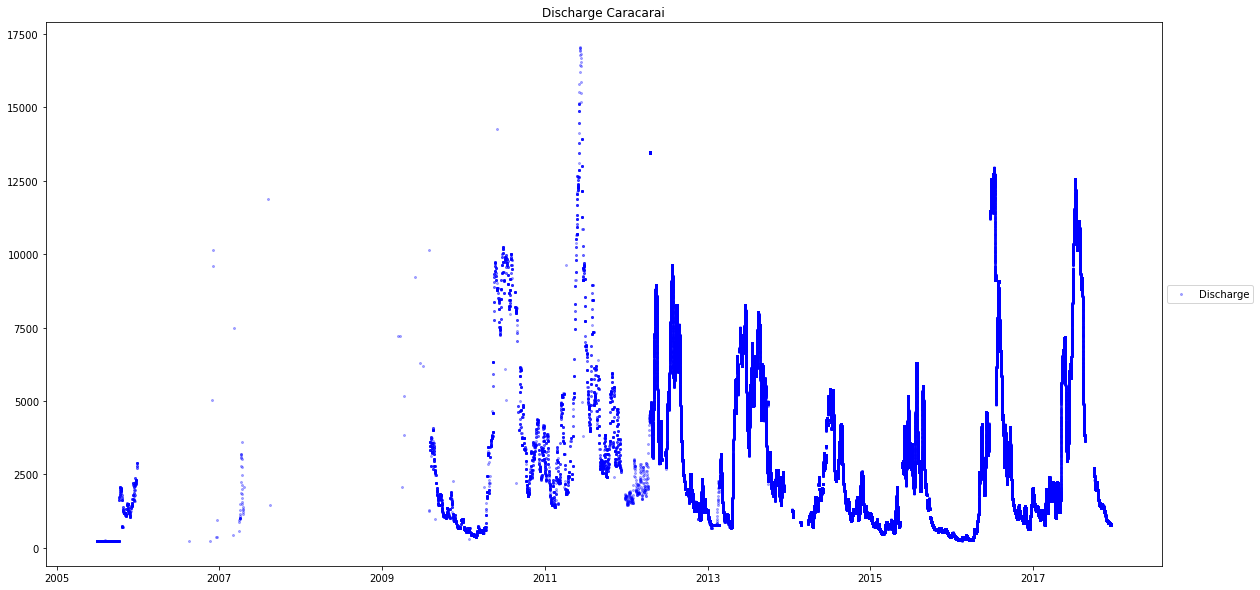

In [54]:
with fileinput.FileInput('/usr/people/killaars/Downloads/14710000CARACARAÍ_2962005-18122017.txt', inplace=True, backup='.bak') as file:
    for line in file:
        print(" ".join(line.split()))

data = pd.read_csv('/usr/people/killaars/Downloads/14710000CARACARAÍ_2962005-18122017.txt', sep=" ")
#data = pd.read_fwf('/usr/people/killaars/Downloads/Small_discharge.txt',header=None)
data.columns = ["Date", "Time", "Discharge", "etc."]

data=data.drop(data.index[0])
print(data)
data["new_date"]=pd.to_datetime(data["Date"],format='%d/%m/%Y')
#print(data)
print(data['Discharge'].groupby(data['new_date']).describe())

f, (ax1) = plt.subplots(1, 1, sharex=True, figsize=(20,10))
size = 2
alpha=.3
ax1.set_title('Discharge Caracarai')
ax1.plot_date(x=data.new_date, y=data.Discharge, color='b', alpha=alpha, ms=size)

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

              Date      Time  Discharge  etc.
1       29/06/2005  01:00:00        NaN   NaN
2       29/06/2005  02:00:00        NaN   NaN
3       29/06/2005  03:00:00    77400.0   NaN
4       29/06/2005  04:00:00    77400.0   NaN
5       29/06/2005  05:00:00    77400.0   NaN
6       29/06/2005  06:00:00    77400.0   NaN
7       29/06/2005  07:00:00    77400.0   NaN
8       29/06/2005  08:00:00    77400.0   NaN
9       29/06/2005  09:00:00    77400.0   NaN
10      29/06/2005  10:00:00    77400.0   NaN
11      29/06/2005  11:00:00    77400.0   NaN
12      29/06/2005  12:00:00    77400.0   NaN
13      29/06/2005  13:00:00    77400.0   NaN
14      29/06/2005  14:00:00    77400.0   NaN
15      29/06/2005  15:00:00    77400.0   NaN
16      29/06/2005  16:00:00    77400.0   NaN
17      29/06/2005  17:00:00    77400.0   NaN
18      29/06/2005  18:00:00    77400.0   NaN
19      29/06/2005  19:00:00    77400.0   NaN
20      29/06/2005  20:00:00    77400.0   NaN
21      29/06/2005  21:00:00    77

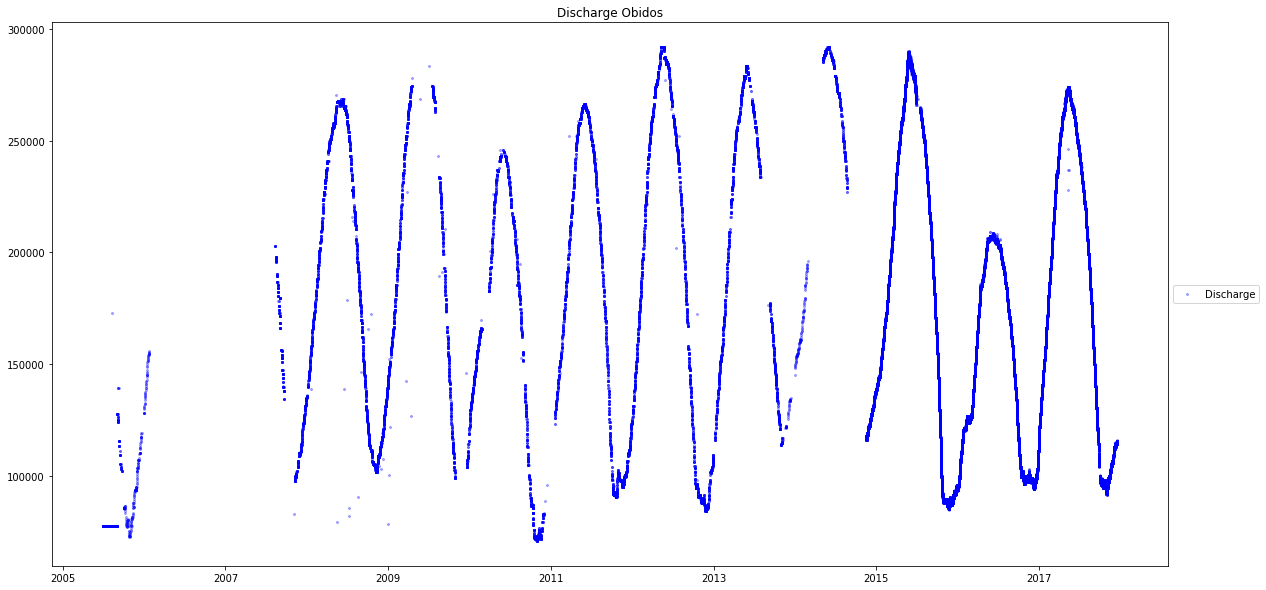

In [71]:
with fileinput.FileInput('/usr/people/killaars/Downloads/17050001ÓBIDOS_2962005-18122017.txt', inplace=True, backup='.bak') as file:
    for line in file:
        print(" ".join(line.split()))

data = pd.read_csv('/usr/people/killaars/Downloads/17050001ÓBIDOS_2962005-18122017.txt', sep=" ")
#data = pd.read_fwf('/usr/people/killaars/Downloads/Small_discharge.txt',header=None)
data.columns = ["Date", "Time", "Discharge", "etc."]

data=data.drop(data.index[0])
print(data)
data["new_date"]=pd.to_datetime(data["Date"],format='%d/%m/%Y')
#print(data)
print(data['Discharge'].groupby(data['new_date']).describe())

f, (ax1) = plt.subplots(1, 1, sharex=True, figsize=(20,10))
size = 2
alpha=.3
ax1.set_title('Discharge Obidos')
ax1.plot_date(x=data.new_date, y=data.Discharge, color='b', alpha=alpha, ms=size)

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()